# PCA, Principal Component Analysis - 주성분 분석
고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원 데이터를 찾아내는 방법이다. **차원축소(dimension reduction)** 라고도 한다.  
더 낮은 차원의 데이터값 변화가 더 높은 차원의 데이터값 변화를 설명할 수 있다는 것은 얼핏 보기에 복잡해 보이는 **고차원 데이터의 변이를 몇 가지 원인으로 설명할 수 있다**는 뜻이다.

입력 차원이 너무 커서 학습이 진행이 잘 되지 않을때, 학습 데이터의 차원을 줄이는 방법으로 PCA를 사용할 수 있다.
 
PCA의 또 다른 이용 방법은 고차원 데이터의 차원을 줄여 시각화 할 때도 유용하게 사용된다.

PCA의 목적은 원 데이터(original data)의 분산을 최대한 보존하는 축을 찾아 투영(projection)하는 것이다.

* 고유벡터(eigenvector) : 기하학적으로 선형변환 A에 의해 방향은 보존되고 스케일(scale)만 변화되는 방향 벡터
* 고유값(eigenvalue) : 그 고유벡터의 변화되는 스케일 정도를 나타내는 값

![pca](../../data/pca.jpg)

PCA를 수행하기 위해 임의의 3차원 데이터를 생성하고 이를 시각화해 본다.

In [1]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)


X.shape: (60, 3)


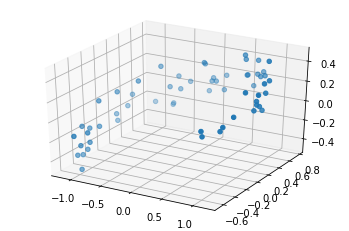

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0],X[:, 1], X[:, 2])

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print('고유값(eigen value) :', pca.explained_variance_)  # 고유벡터로 사영했을때 분산
print('고유벡터(eigen vector) :\n', pca.components_)  # 분산이 최대화 되는 방향 벡터 고유벡터=주성분

고유값(eigen value) : [0.77830975 0.1351726  0.01034272]
고유벡터(eigen vector) :
 [[-0.93636116 -0.29854881 -0.18465208]
 [ 0.34027485 -0.90119108 -0.2684542 ]
 [-0.08626012 -0.31420255  0.94542898]]


### 적절한 차원 수 선택하기
* 원본의 차원과 같은 수의 주성분이 생성된다. 데이터의 정보 손실을 최소화하는 적절한 차원의 수를 선택한다.
* 'Explained Variance Ratio'를 이용해 축소할 차원의 수를 선택할 수 있다. 
* 예를들어, 누적된 분산의 비율이 95%가 되는 주성분 축, 차원을 선택하는 것과 같은 방법

In [5]:
print('explained variance ratio :', pca.explained_variance_ratio_)

explained variance ratio : [0.84248607 0.14631839 0.01119554]


2개의 합이 전체 분산의 99%를 설명한다. 주성분의 갯수를 2로 한다. 

In [6]:
#Scikit-Learn의 PCA에서는 n_components에 0 ~ 1사이의 값을 지정해 PCA 계산을 할 수 있다. 

pca = PCA(n_components=0.95)
X_proj = pca.fit_transform(X)

print('주성분 벡터 :\n', pca.components_)

print('원본 데이터:',X[0,:])
print('주성분 변환 데이터:',X_proj[0,:])

주성분 벡터 :
 [[-0.93636116 -0.29854881 -0.18465208]
 [ 0.34027485 -0.90119108 -0.2684542 ]]
원본 데이터: [-1.01570027 -0.55091331 -0.26132626]
주성분 변환 데이터: [1.26203346 0.42067648]


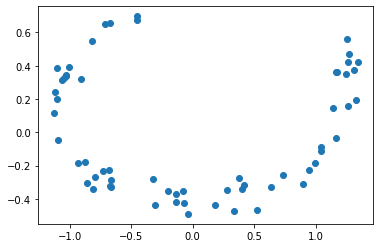

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_proj[:,0], X_proj[:,1],'o')

### iris 데이터셋 PCA

In [8]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

iris = datasets.load_iris()
X_iris = iris.data[:, :2]

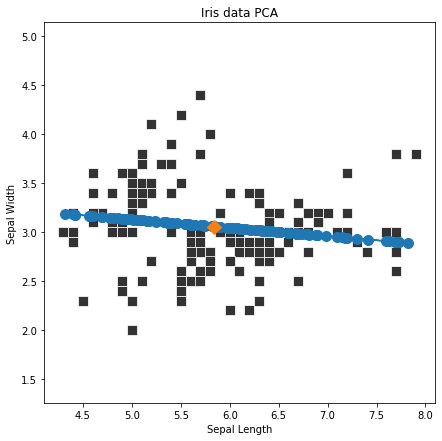

In [9]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)  # 주성분의 갯수를 1로
X_low = pca1.fit_transform(X_iris)  # 주성분을 적용하여 변환된 값
X2 = pca1.inverse_transform(X_low)  # 변환된 값을 주성분을 사용하여 다시 복원한 값

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X_iris), s=100, color=".2", marker="s")

plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X_iris[:, 0].mean(), X_iris[:, 1].mean(), markersize=10, marker="D")

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris data PCA")
plt.axis("equal")
plt.show()

In [10]:
#데이터의 평균값은 mean_ 속성으로 볼 수 있다.
pca1.mean_

array([5.84333333, 3.05733333])

In [11]:
# 근사 데이터를 만드는 주성분벡터는 components_ 속성에서 구할 수 있다.
pca1.components_

array([[ 0.99640834, -0.08467831]])

In [12]:
# 0번꽃, 주성분으로 계산된값, 주성분 벡터로 복원된 값
X_iris[0,:], X_low[0], X2[0,:]

(array([5.1, 3.5]), array([-0.7781478]), array([5.06798038, 3.12322557]))

# 유방암 데이터를 PCA로 차원 축소

유방암 데이터에는 악성 / 양성과 관련된 30개의 변수가 있다. 이것을 2차원으로 축소하여 시각화 해본다.

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [14]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


['malignant' 'benign']


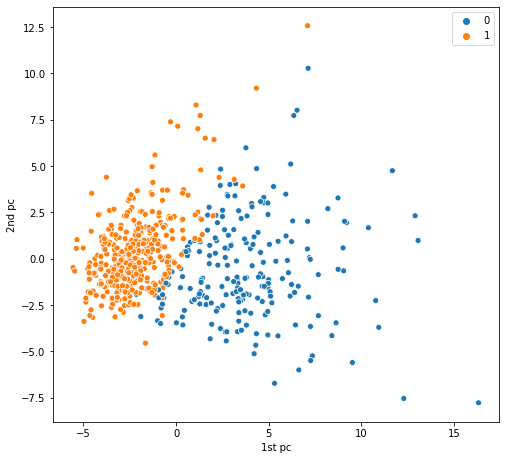

In [15]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
print(cancer.target_names)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=cancer.target)

plt.gca().set_aspect("equal")
plt.xlabel("1st pc")
plt.ylabel("2nd pc")
plt.show()

Text(0, 0.5, 'pc')

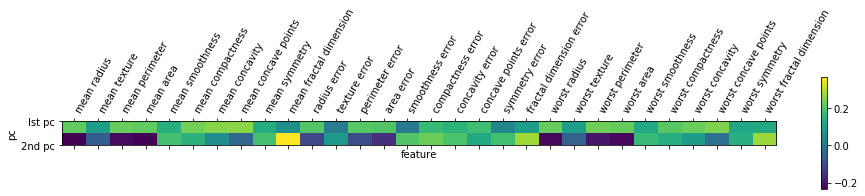

In [16]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["lst pc", "2nd pc"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("pc")